Column Description:

    Country – Name of the country.
    Region– Geographic region of the country.
    Happiness Rank – Country’s position based on happiness score.
    Happiness Score – Overall happiness rating.
    Standard Error– Measurement uncertainty of the score.
    Economy (GDP per Capita) – Economic performance of the country. (ВВП)
    Family – Level of social support available.
    Health (Life Expectancy)– Quality and length of healthy life.
    Freedom – Degree of personal freedom.
    Trust (Government Corruption) – Perception of corruption levels.
    Generosity – The Willingness of people to give me and support others.
    Dystopia Residual – Baseline value representing the possible life conditions.
    Year – Reporting year of the score.


In [120]:
import pandas as pd

df = pd.read_csv(r'./data/world_happiness_report.csv', sep=',', encoding='utf-8', index_col=0)
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1231 entries, 0 to 1230
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        617 non-null    object 
 1   Region                         315 non-null    object 
 2   Happiness Rank                 315 non-null    float64
 3   Happiness Score                315 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       315 non-null    float64
 6   Family                         470 non-null    float64
 7   Health (Life Expectancy)       315 non-null    float64
 8   Freedom                        470 non-null    float64
 9   Trust (Government Corruption)  315 non-null    float64
 10  Generosity                     1084 non-null   float64
 11  Dystopia Residual              315 non-null    float64
 12  year                           1231 non-null   int64 

In [122]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
count,315.000000,315.000000,158.000000,315.000000,470.000000,315.000000,470.000000,315.000000,1084.000000,315.000000,1231.000000
mean,79.238095,5.378949,0.047885,0.899837,0.990347,0.594054,0.402828,0.140532,0.153545,2.212032,2018.450041
std,45.538922,1.141531,0.017146,0.410780,0.318707,0.240790,0.150356,0.115490,0.167592,0.558728,2.284034
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300907,0.328580,2015.000000
25%,40.000000,4.510000,0.037268,0.594900,0.793000,0.419645,0.297615,0.061315,0.064828,1.884135,2016.000000
50%,79.000000,5.286000,0.043940,0.973060,1.025665,0.640450,0.418347,0.106130,0.162140,2.211260,2018.000000
75%,118.500000,6.269000,0.052300,1.229000,1.228745,0.787640,0.516850,0.178610,0.252000,2.563470,2020.000000
max,158.000000,7.587000,0.136930,1.824270,1.610574,1.025250,0.669730,0.551910,0.838075,3.837720,2022.000000


In [123]:
# считаем пропуски
missing_values = df.isnull().sum()
percentage = (df.isnull().mean().round(2) * 100)
missing_values = pd.DataFrame({'Count': missing_values, 'Percentage of null': percentage})
missing_values

,Count,Percentage of null
Country,614,50.0
Region,916,74.0
Happiness Rank,916,74.0
Happiness Score,916,74.0
Standard Error,1073,87.0
Economy (GDP per Capita),916,74.0
Family,761,62.0
Health (Life Expectancy),916,74.0
Freedom,761,62.0
Trust (Government Corruption),916,74.0


In [124]:
# проверка и вывод дублей
duplicates = df.duplicated().sum()
duplicates

duplicate_rows = df[df.duplicated()]
print(duplicate_rows.shape)
duplicate_rows


(91, 13)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256,NaN,2018
502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.098,NaN,2018
527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.179,NaN,2018
528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.065,NaN,2018
530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.202,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.061,NaN,2021
1073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.089,NaN,2021
1075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.147,NaN,2021
1078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.038,NaN,2021


In [125]:
# проверяем на аномалии в данных
df[(df['year'] < 2000) | (df['year'] > 2025)].shape # пример для года
for column in df.select_dtypes(include=['float64', 'int64']).columns: # перебираем числовые столбцы
    to_print = df[df[column] < 0] # пример для поиска отрицательных значений
    if not to_print.empty:
        print(to_print[column], column)
        print(to_print.shape)


782    -0.059482
791    -0.004621
796    -0.102430
800    -0.230862
801    -0.078691
          ...   
1075   -0.147000
1079   -0.131000
1080   -0.246000
1082   -0.047000
1083   -0.102000
Name: Generosity, Length: 173, dtype: float64 Generosity
(173, 13)


вывод для этого датасета:

- Большое количество пропущенных значений (для некоторых столбцов аж 74 процента)
- 91 строк не имеют смысла (все значения NaN, кроме значений столбцов ```Generosity``` и ```year```)
- 173 строки имеют значение ```Generosity``` < 0 (не совсем понятно, как это интерпретировать)
- в столбце Country есть непонятное значение ```xx``` и дубликаты стран со ```*``` в конце

In [126]:
# EDA
for column in df.select_dtypes(include=['object']).columns:
    count = df[column].value_counts()
    print(count)

Country
Switzerland    4
Iceland        4
Denmark        4
Norway         4
Canada         4
              ..
Mauritania*    1
Lesotho*       1
Botswana*      1
Rwanda*        1
xx             1
Name: count, Length: 192, dtype: int64
Region
Sub-Saharan Africa                 78
Central and Eastern Europe         58
Latin America and Caribbean        46
Western Europe                     42
Middle East and Northern Africa    39
Southeastern Asia                  18
Southern Asia                      14
Eastern Asia                       12
North America                       4
Australia and New Zealand           4
Name: count, dtype: int64


в столбце ```Country``` превалируют развитые страны. то есть в датасете больше всего записей именно о них

из толбца ```Region``` видно распределение стран по материкам (самое плотное - в Африке) 

In [127]:
# самые счастливые регионы по среднему показателю счастья
result = df.groupby('Region').agg({
    'Happiness Score': ['mean', 'min'],
}).sort_values(by=('Happiness Score', 'mean'), ascending=False)
result

Happiness Score       
                                           mean    min
Region                                                
Australia and New Zealand              7.304250  7.284
North America                          7.263500  7.104
Western Europe                         6.687643  4.857
Latin America and Caribbean            6.122283  4.028
Eastern Asia                           5.625167  4.874
Middle East and Northern Africa        5.396744  3.006
Central and Eastern Europe             5.351810  4.217
Southeastern Asia                      5.328167  3.819
Southern Asia                          4.572071  3.360
Sub-Saharan Africa                     4.170462  2.839

как видим, самые счастливые страны (по датасету) это самые развитые 

а самые несчастные это страны Африки

интересно почему

строим графики

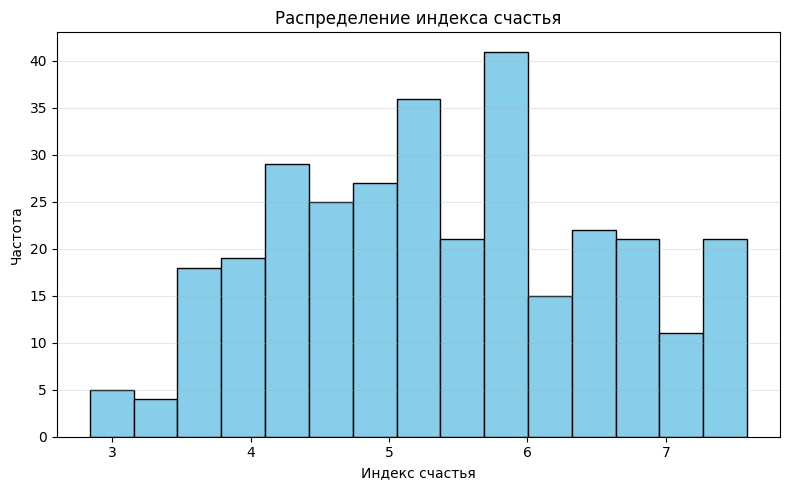

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import os

save_path = './figures'
# Создаём папку для графиков, если её нет
os.makedirs(save_path, exist_ok=True)

# Гистограмма — Happiness Score
plt.figure(figsize=(8, 5))
plt.hist(df['Happiness Score'].dropna(), bins=15, color='skyblue', edgecolor='black')
plt.title('Распределение индекса счастья')
plt.xlabel('Индекс счастья')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(save_path + '/happiness_score_histogram.png')
plt.show()

как видно из графика, распределение стремится к нормальному 

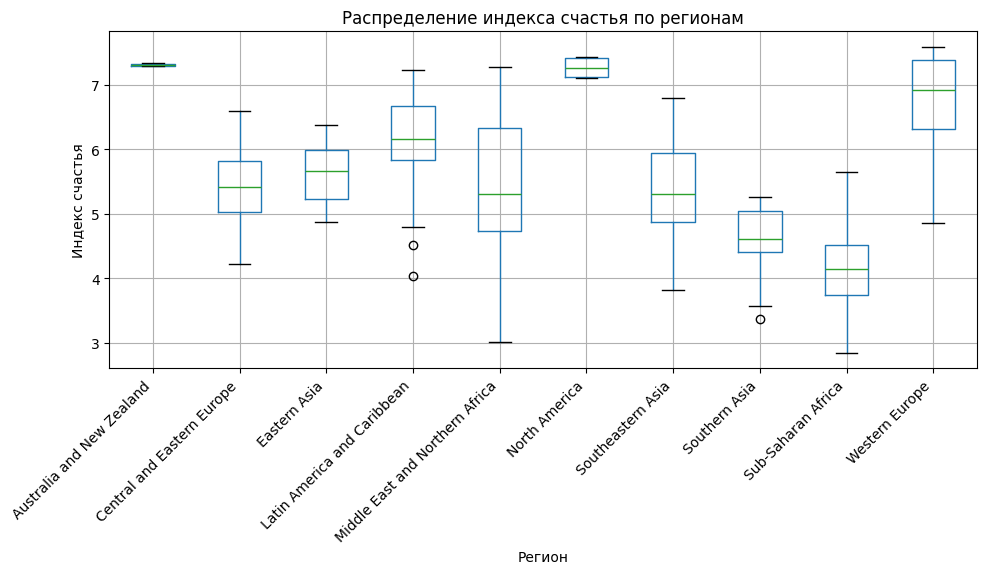

In [129]:
# 2. Боксплот по регионам
plt.figure(figsize=(10, 6))
df.boxplot(column='Happiness Score', by='Region', ax=plt.gca())
plt.title('Распределение индекса счастья по регионам')
plt.suptitle('')  
plt.xlabel('Регион')
plt.ylabel('Индекс счастья')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(save_path + '/happiness_score_by_region_boxplot.png')
plt.show()

самый большой разброс показателя счастья - в Африке (видим из графика, есть как и сильно "несчастные" страны, так и очень "счастливые")


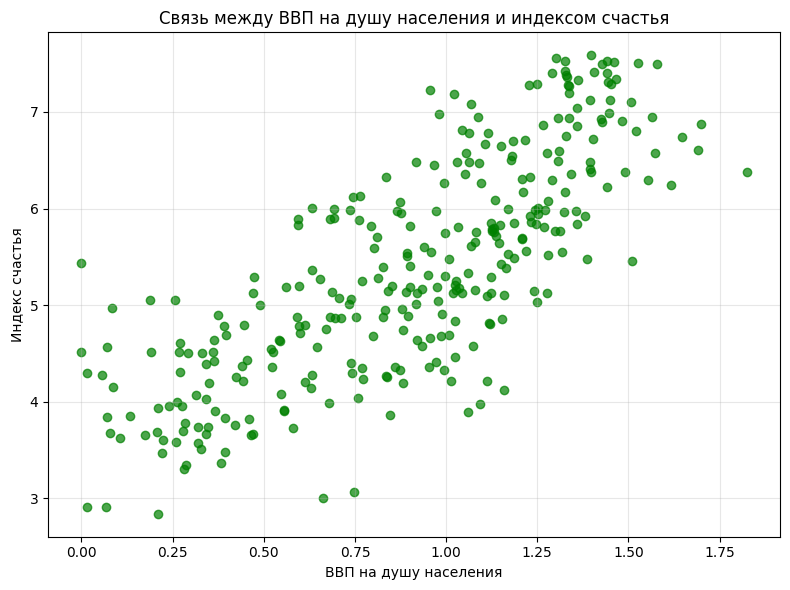

In [130]:
# 3. Scatter plot — GDP vs Happiness
plt.figure(figsize=(8, 6))
plt.scatter(df['Economy (GDP per Capita)'], df['Happiness Score'], alpha=0.7, color='green')
plt.title('Связь между ВВП на душу населения и индексом счастья')
plt.xlabel('ВВП на душу населения')
plt.ylabel('Индекс счастья')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(save_path + '/gdp_vs_happiness_scatter.png')
plt.show()

как видно из графика, в целом, индекс счастья зависит от ВВП линейно (т.е. чем больше ВВП - тем больше индекс счастья)